## Observations and Insights 

## Data Analysis 

In [1]:
# Dependencies and Setup
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouseDF = pd.read_csv(mouse_metadata_path)
resultsDF = pd.read_csv(study_results_path)

In [2]:
# join the data sets
mouse_resultsDF = pd.merge(mouseDF, resultsDF, how="left", on=["Mouse ID", "Mouse ID"])
mouse_resultsDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# total_mice
total_mice = len(mouse_resultsDF["Mouse ID"].value_counts())
total_mice

249

In [4]:
# any duplicate_ids for Mouse ID, Timepoint combonation
mouse_cols = ["Mouse ID","Timepoint"]
duplicate_ids = mouse_resultsDF[(mouse_resultsDF.duplicated(mouse_cols) == True)]["Mouse ID"].unique()
duplicate_ids

array(['g989'], dtype=object)

In [5]:
# all results for duplicate_ids
mouse_resultsDF[mouse_resultsDF["Mouse ID"].isin(duplicate_ids)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# drop all results for duplicate_ids
mouse_resultsDF.drop(mouse_resultsDF[mouse_resultsDF["Mouse ID"].isin(duplicate_ids)].index, inplace=True)
mouse_resultsDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# total_mice
total_mice = len(mouse_resultsDF["Mouse ID"].value_counts())
total_mice

248

## Summary Statistics 

In [8]:
# copy to focused dataframe
drug_regimen_tumor_vol = mouse_resultsDF[["Drug Regimen", "Tumor Volume (mm3)"]]

# calculate aggregates
tumor_vol_mean = drug_regimen_tumor_vol.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_vol_median = drug_regimen_tumor_vol.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_vol_var = drug_regimen_tumor_vol.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_vol_std = drug_regimen_tumor_vol.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_vol_sem = drug_regimen_tumor_vol.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

In [9]:
# create new dataframe
drug_regimen_summary = pd.DataFrame({'Mean': tumor_vol_mean, 
                                    'Median': tumor_vol_median,          
                                    'Variance': tumor_vol_var,          
                                    'Standard Deviation': tumor_vol_std,          
                                    'Standard Error of Mean': tumor_vol_sem})
drug_regimen_summary

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# display summary from aggregate function
drug_regimen_tumor_vol.groupby(["Drug Regimen"]).aggregate(['mean','median','var','std','sem'])["Tumor Volume (mm3)"].rename(
    columns={'mean':'Mean', 'median':'Median', 'var':'Variance', 'std':'Standard Deviation', 'sem':'Standard Error of Mean'})

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [11]:
# shape plot data
regimen_timepoints = mouse_resultsDF.groupby(["Drug Regimen"])["Timepoint"].count()

<IPython.core.display.Javascript object>


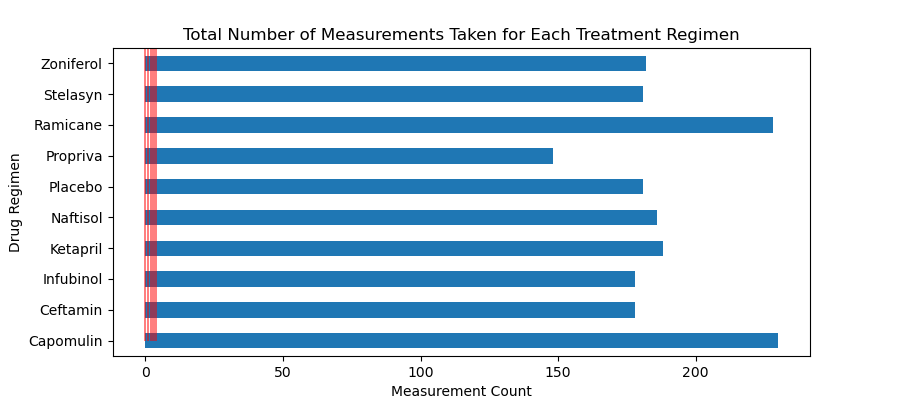

Text(0.5, 1.0, 'Total Number of Measurements Taken for Each Treatment Regimen')

In [12]:
# plot bars using Pandas.
ax = regimen_timepoints.plot(kind='barh', figsize=(9,4))
ax.set_xlabel("Measurement Count")
ax.set_title("Total Number of Measurements Taken for Each Treatment Regimen")

In [13]:
users = [13000, 26000, 52000, 30000, 9000]
x_axis = np.arange(len(users))
plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

<BarContainer object of 5 artists>

## Quartiles, Outliers and Boxplots

## Line and Scatter Plots

## Correlation and Regression 